# BHARAT INTERN

## NAME-UPPE DATTA HARSHITHA

## TASK1-STOCK PREDICTION
- IN THIS WE WILL USE THE NSE TATA GLOBAL BEVERAGES DATASET FOR STOCK PREDICTION

## IMPORT LIBRARIES


In [4]:
from sklearn.linear_model import LogisticRegression 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Load data from a CSV file

In [6]:
df = pd.read_csv(r"C:\Users\Uppe.Datta Harshitha\Downloads\NSE-Tata-Global-Beverages-Limited.csv")
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


## SHAPE OF DATA

In [7]:
df.shape

(1235, 8)

## GATHERING INFORMATION ABOUT THE DATA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [9]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [10]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [11]:
df=df.reset_index()['Close']
df

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

In [12]:
df.isnull().sum()

0

In [13]:
df

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

## PREPROCESSING

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [15]:
print(df)

[[0.50425818]
 [0.47758853]
 [0.51792918]
 ...
 [0.25773196]
 [0.2371134 ]
 [0.23823398]]


## DEFINING TIME STEP AND CREATING TRAINING AND TEST DATASETS ACCORDING TO THE TIMESTAMP

In [16]:
training_size=int(len(df)*0.75)
test_size=int(len(df))-training_size
train_data, test_data = df[0:training_size,:],df[training_size:len(df),:1]

In [17]:
training_size,test_size

(926, 309)

In [18]:
train_data,test_data

(array([[0.50425818],
        [0.47758853],
        [0.51792918],
        [0.56006275],
        [0.57485433],
        [0.58762887],
        [0.58538772],
        [0.58987001],
        [0.59816226],
        [0.58561183],
        [0.59143882],
        [0.59278351],
        [0.59345585],
        [0.60040341],
        [0.58852532],
        [0.53787539],
        [0.50806813],
        [0.5349619 ],
        [0.53922008],
        [0.53070372],
        [0.53675482],
        [0.5425818 ],
        [0.60085164],
        [0.59009413],
        [0.59771403],
        [0.5912147 ],
        [0.58583595],
        [0.60242044],
        [0.57530255],
        [0.59524877],
        [0.61810847],
        [0.63872703],
        [0.62909009],
        [0.61272972],
        [0.60466159],
        [0.5912147 ],
        [0.58673241],
        [0.60354101],
        [0.59928283],
        [0.6048857 ],
        [0.61340206],
        [0.59166293],
        [0.59524877],
        [0.59614523],
        [0.64657104],
        [0

## CONVERT AN ARRAY VALUES INTO A DATASET

In [19]:
def create_feartures(dataset,time_steps=1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_steps-1):
        a=dataset[i:(i+time_steps),0]
        dataX.append(a)
        dataY.append(dataset[i+time_steps, 0])
    return np.array(dataX), np.array(dataY)

## RESHAPE INTO X=t,t+2,t+3 and t+4 

In [20]:
ts=100
x_train, y_train=create_feartures(train_data, ts)
x_test, y_test = create_feartures(test_data,ts)

In [21]:
print(x_train.shape), print(y_train.shape)

(825, 100)
(825,)


(None, None)

## TRAIN A LINEAR LIGRESSION MODEL 

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## MAKE PREDICTIONS

In [23]:
y_pred = model.predict(x_test)

## CALCULATING RMSE

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.00015655978541034062
Root Mean Squared Error: 0.012512385280606596
R-squared: 0.9016066362491206


## PLOT THE ACTUAL VS PREDICTED VALUES FOR TRAINING DATA

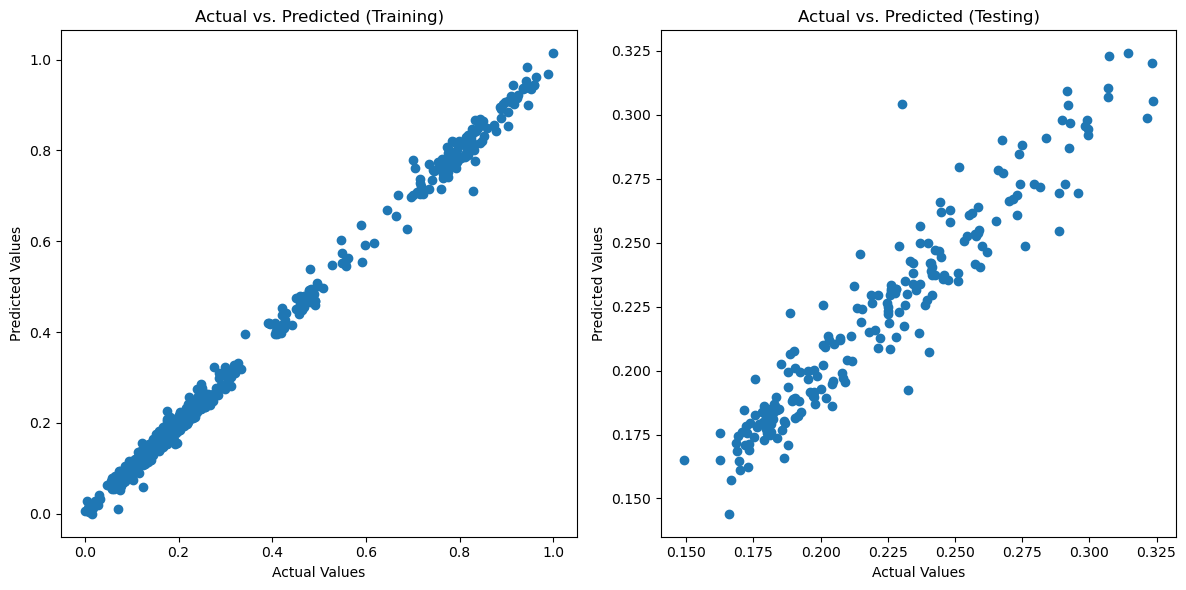

In [25]:
import matplotlib.pyplot as plt
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (Training)")
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (Testing)")
plt.tight_layout()
plt.show()

In [26]:
len(test_data)

309

In [27]:
x_input=test_data[209:].reshape(1,-1)
x_input.shape

(1, 100)

## PREDICTING THE VALUES FOR NEXT 100 DAYS

In [28]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.16606902734199908,
 0.16651725683549984,
 0.17279246974450907,
 0.17951591214701917,
 0.1763783056925145,
 0.17234424025100842,
 0.16898251904975342,
 0.16831017480950244,
 0.16248319139399375,
 0.16987897803675484,
 0.17525773195876287,
 0.1855670103092784,
 0.18915284625728362,
 0.18354997758852526,
 0.18242940385477363,
 0.17256835499775885,
 0.18108471537427168,
 0.18153294486777233,
 0.1705513222770057,
 0.17189601075750777,
 0.16943074854325407,
 0.1770506499327656,
 0.16270730614074397,
 0.17346481398476016,
 0.18646346929627972,
 0.20416853428955622,
 0.2115643209323173,
 0.20259973106230383,
 0.204616763783057,
 0.19520394441954275,
 0.20797848498431198,
 0.2214253697893322,
 0.2214253697893322,
 0.22523532048408784,
 0.23890632003585827,
 0.24473330345136707,
 0.2440609592111161,
 0.24137158225011207,
 0.24271627073061414,
 0.24069923800986098,
 0.23442402510085153,
 0.2593007619901389,
 0.2590766472433886,
 0.25616315553563423,
 0.2483191393993725,
 0.2617660242043927,
 0

In [29]:
day_new=np.imag(1)
day_pred=np.imag(101)

In [30]:
len(df)

1235

## THIS IS THE GRAPH OF ACTUAL VALUES IN LAST 100 DAYS

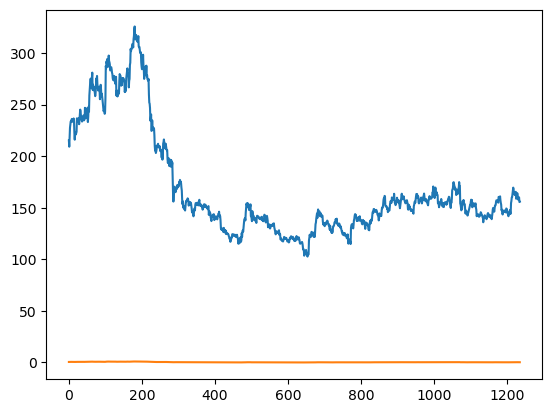

In [31]:
df1=df.tolist()
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)
plt.plot(df)
